In [1]:
import pypsa
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import folium
import math
import networkx as nx
import import_ipynb
import cartopy.crs as ccrs
from shapely.geometry import Polygon

In [2]:
initial_network_nodes = pd.read_csv('database/substations_kalimantan.csv', sep = ",", quotechar = "'")

initial_network_nodes

,"""",node,type,lon,lat,frequency,voltage,node_id,wkt_srid_4326,""".1"
0,"""",GI_Sambas,substation,109.2688,1.3429,50,150,0,SRID=4326;POINT(109.2688 1.3429),""""
1,"""",GI_Singkawang,substation,108.9876,0.9266,50,150,1,SRID=4326;POINT(108.9876 0.9266),""""
2,"""",GI_PLTU_3_Kalbar,substation,108.8747,0.8361,50,150,2,SRID=4326;POINT(108.8747 0.8361),""""
3,"""",GI_PLTU_2_Kalbar,substation,108.8653,0.8300,50,150,3,SRID=4326;POINT(108.8653 0.83),""""
4,"""",GI_Senggiring,substation,108.9853,0.3162,50,150,4,SRID=4326;POINT(108.9853 0.3162),""""
...,...,...,...,...,...,...,...,...,...,...
59,"""",GI_Sangatta,substation,117.5693,0.4701,50,150,59,SRID=4326;POINT(117.5693 0.4701),""""
60,"""",GI_Malinau,substation,116.6286,3.5114,50,150,60,SRID=4326;POINT(116.6286 3.5114),""""
61,"""",GI_Tideng_Pale,substation,116.8411,3.5748,50,150,61,SRID=4326;POINT(116.8411 3.5748),""""
62,"""",GI_Muara_Wahau,substation,116.9215,1.0533,50,150,62,SRID=4326;POINT(116.9215 1.0533),""""


In [3]:
initial_network = pd.read_csv('database/lines_kalimantan.csv', sep = ",", quotechar = "'")

initial_network

,"""",nodeA,nodeB,bus0,bus1,voltage,cables,wires,frequency,length_m,r_ohmkm,x_ohmkm,c_nfkm,i_th_max_a,lon0,lat0,lon1,lat1,wkt_srid_4326,""".1"
0,"""",GI_Sambas,GI_Singkawang,0,1,150,3,2,50,59200,0.08,0.32,11.5,1.3,109.2688,1.3429,108.9876,0.9266,"SRID=4326;LINESTRING(109.2688 1.3429,108.9876 ...",""""
1,"""",GI_Singkawang,GI_PLTU_2_Kalbar,1,3,150,3,2,50,20829,0.08,0.32,11.5,1.3,108.9876,0.9266,108.8653,0.8300,"SRID=4326;LINESTRING(108.9876 0.9266,108.8653 ...",""""
2,"""",GI_PLTU_2_Kalbar,GI_PLTU_3_Kalbar,3,2,150,3,2,50,1393,0.08,0.32,11.5,1.3,108.8653,0.8300,108.8747,0.8361,"SRID=4326;LINESTRING(108.8653 0.83,108.8747 0....",""""
3,"""",GI_Singkawang,GI_Senggiring,1,4,150,3,2,50,70613,0.08,0.32,11.5,1.3,108.9876,0.9266,108.9853,0.3162,"SRID=4326;LINESTRING(108.9876 0.9266,108.9853 ...",""""
4,"""",GI_Senggiring,GI_Parit_Baru,4,5,150,3,2,50,42848,0.08,0.32,11.5,1.3,108.9853,0.3162,109.2055,0.0592,"SRID=4326;LINESTRING(108.9853 0.3162,109.2055 ...",""""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,"""",GI_Teluk_Pandan,GI_Sangatta,58,59,150,3,2,50,42347,0.08,0.32,11.5,1.3,117.4350,0.1614,117.5693,0.4701,"SRID=4326;LINESTRING(117.435 0.1614,117.5693 0...",""""
61,"""",GI_Malinau,GI_Tideng_Pale,60,61,150,3,2,50,28625,0.08,0.32,11.5,1.3,116.6286,3.5114,116.8411,3.5748,"SRID=4326;LINESTRING(116.6286 3.5114,116.8411 ...",""""
62,"""",GI_Muara_Wahau,GI_Sangatta,62,59,150,3,2,50,95892,0.08,0.32,11.5,1.3,116.9215,1.0533,117.5693,0.4701,"SRID=4326;LINESTRING(116.9215 1.0533,117.5693 ...",""""
63,"""",GI_Muara_Wahau,GI_Bulungan,62,63,150,3,2,50,197219,0.08,0.32,11.5,1.3,116.9215,1.0533,117.3678,2.8101,"SRID=4326;LINESTRING(116.9215 1.0533,117.3678 ...",""""


In [4]:
combined = initial_network.merge(initial_network_nodes, left_on = "nodeA", right_on = "node", suffixes = ("_left", "_right"))
combined = combined.merge(initial_network_nodes, left_on  = "nodeB", right_on = "node", suffixes = ("_A", "_B"))
combined = combined [["nodeA", "lon_A", "lat_A", "nodeB", "lon_B", "lat_B"]]

display(combined)

,nodeA,lon_A,lat_A,nodeB,lon_B,lat_B
0,GI_Sambas,109.2688,1.3429,GI_Singkawang,108.9876,0.9266
1,GI_Bengkayang,109.4967,0.9056,GI_Singkawang,108.9876,0.9266
2,GI_Singkawang,108.9876,0.9266,GI_PLTU_2_Kalbar,108.8653,0.8300
3,GI_Singkawang,108.9876,0.9266,GI_Senggiring,108.9853,0.3162
4,GI_PLTU_2_Kalbar,108.8653,0.8300,GI_PLTU_3_Kalbar,108.8747,0.8361
...,...,...,...,...,...,...
60,GI_Teluk_Pandan,117.4350,0.1614,GI_Sangatta,117.5693,0.4701
61,GI_Muara_Wahau,116.9215,1.0533,GI_Sangatta,117.5693,0.4701
62,GI_Malinau,116.6286,3.5114,GI_Tideng_Pale,116.8411,3.5748
63,GI_Muara_Wahau,116.9215,1.0533,GI_Bulungan,117.3678,2.8101


In [5]:
basemap = folium.Map(location = [-0.152375, 113.899132], zoom_start = 6)

maxvoltage = max(initial_network_nodes.voltage)

for i in range(len(initial_network_nodes)):
    popupinfo = (initial_network_nodes.node.iloc[i]+ ",voltage:" + str(initial_network_nodes.voltage.iloc[i]))
    folium.CircleMarker(location = [initial_network_nodes.lat.iloc[i], initial_network_nodes.lon.iloc[i]], 
                       tooltip = popupinfo, color = "green", fill = True, 
                       radius = math.sqrt(10 * initial_network_nodes.voltage.iloc[i] / maxvoltage)).add_to(basemap)

for i in range(len(combined)):
    points = [[combined.lat_A.iloc[i], combined.lon_A.iloc[i]],
             [combined.lat_B.iloc[i], combined.lon_B.iloc[i]]]
    folium.PolyLine(points, color = "yellow", opacitiy = 0.7).add_to(basemap)
    
basemap.save("initial_nodes.html")

display(basemap)

In [2]:
vertices = pd.read_csv("database/substations_kalimantan.csv", sep = ",", quotechar = "'")
vertices.rename(columns = {"lon":"x", "lat":"y"}, inplace = True)

print(vertices["voltage"].value_counts(dropna = False))

150    63
275     1
Name: voltage, dtype: int64


In [3]:
vertices

,"""",node,type,x,y,frequency,voltage,node_id,wkt_srid_4326,""".1"
0,"""",GI_Sambas,substation,109.2688,1.3429,50,150,0,SRID=4326;POINT(109.2688 1.3429),""""
1,"""",GI_Singkawang,substation,108.9876,0.9266,50,150,1,SRID=4326;POINT(108.9876 0.9266),""""
2,"""",GI_PLTU_3_Kalbar,substation,108.8747,0.8361,50,150,2,SRID=4326;POINT(108.8747 0.8361),""""
3,"""",GI_PLTU_2_Kalbar,substation,108.8653,0.8300,50,150,3,SRID=4326;POINT(108.8653 0.83),""""
4,"""",GI_Senggiring,substation,108.9853,0.3162,50,150,4,SRID=4326;POINT(108.9853 0.3162),""""
...,...,...,...,...,...,...,...,...,...,...
59,"""",GI_Sangatta,substation,117.5693,0.4701,50,150,59,SRID=4326;POINT(117.5693 0.4701),""""
60,"""",GI_Malinau,substation,116.6286,3.5114,50,150,60,SRID=4326;POINT(116.6286 3.5114),""""
61,"""",GI_Tideng_Pale,substation,116.8411,3.5748,50,150,61,SRID=4326;POINT(116.8411 3.5748),""""
62,"""",GI_Muara_Wahau,substation,116.9215,1.0533,50,150,62,SRID=4326;POINT(116.9215 1.0533),""""


In [4]:
links = pd.read_csv("database/lines_kalimantan.csv", sep = ",", quotechar = "'")

links["cables"].fillna(3, inplace = True)
links["wires"].fillna(2, inplace = True)
links["length"] = links["length_m"]/1000.

print(links["voltage"].value_counts(dropna = False))

150    65
Name: voltage, dtype: int64


In [5]:
links

,"""",nodeA,nodeB,bus0,bus1,voltage,cables,wires,frequency,length_m,...,x_ohmkm,c_nfkm,i_th_max_a,lon0,lat0,lon1,lat1,wkt_srid_4326,""".1",length
0,"""",GI_Sambas,GI_Singkawang,0,1,150,3,2,50,59200,...,0.32,11.5,1.3,109.2688,1.3429,108.9876,0.9266,"SRID=4326;LINESTRING(109.2688 1.3429,108.9876 ...","""",59.200
1,"""",GI_Singkawang,GI_PLTU_2_Kalbar,1,3,150,3,2,50,20829,...,0.32,11.5,1.3,108.9876,0.9266,108.8653,0.8300,"SRID=4326;LINESTRING(108.9876 0.9266,108.8653 ...","""",20.829
2,"""",GI_PLTU_2_Kalbar,GI_PLTU_3_Kalbar,3,2,150,3,2,50,1393,...,0.32,11.5,1.3,108.8653,0.8300,108.8747,0.8361,"SRID=4326;LINESTRING(108.8653 0.83,108.8747 0....","""",1.393
3,"""",GI_Singkawang,GI_Senggiring,1,4,150,3,2,50,70613,...,0.32,11.5,1.3,108.9876,0.9266,108.9853,0.3162,"SRID=4326;LINESTRING(108.9876 0.9266,108.9853 ...","""",70.613
4,"""",GI_Senggiring,GI_Parit_Baru,4,5,150,3,2,50,42848,...,0.32,11.5,1.3,108.9853,0.3162,109.2055,0.0592,"SRID=4326;LINESTRING(108.9853 0.3162,109.2055 ...","""",42.848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,"""",GI_Teluk_Pandan,GI_Sangatta,58,59,150,3,2,50,42347,...,0.32,11.5,1.3,117.4350,0.1614,117.5693,0.4701,"SRID=4326;LINESTRING(117.435 0.1614,117.5693 0...","""",42.347
61,"""",GI_Malinau,GI_Tideng_Pale,60,61,150,3,2,50,28625,...,0.32,11.5,1.3,116.6286,3.5114,116.8411,3.5748,"SRID=4326;LINESTRING(116.6286 3.5114,116.8411 ...","""",28.625
62,"""",GI_Muara_Wahau,GI_Sangatta,62,59,150,3,2,50,95892,...,0.32,11.5,1.3,116.9215,1.0533,117.5693,0.4701,"SRID=4326;LINESTRING(116.9215 1.0533,117.5693 ...","""",95.892
63,"""",GI_Muara_Wahau,GI_Bulungan,62,63,150,3,2,50,197219,...,0.32,11.5,1.3,116.9215,1.0533,117.3678,2.8101,"SRID=4326;LINESTRING(116.9215 1.0533,117.3678 ...","""",197.219


In [6]:
# drop the DC lines
# not sure how this works

for voltage in [300,400,450]:
    links.drop(links[links.voltage == voltage].index,inplace=True)

In [7]:
# build the network
# don't forget to pray for the best

network = pypsa.Network()

pypsa.io.import_components_from_dataframe(network, vertices, "Bus")
pypsa.io.import_components_from_dataframe(network, links, "Line")

In [8]:
network.buses

,"""",node,type,x,y,frequency,voltage,node_id,wkt_srid_4326,""".1",v_nom,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,sub_network
Bus,,,,,,,,,,,,,,,,,,
0,"""",GI_Sambas,substation,109.2688,1.3429,50,150,0,SRID=4326;POINT(109.2688 1.3429),"""",1.0,AC,None,1.0,0.0,inf,PQ,
1,"""",GI_Singkawang,substation,108.9876,0.9266,50,150,1,SRID=4326;POINT(108.9876 0.9266),"""",1.0,AC,None,1.0,0.0,inf,PQ,
2,"""",GI_PLTU_3_Kalbar,substation,108.8747,0.8361,50,150,2,SRID=4326;POINT(108.8747 0.8361),"""",1.0,AC,None,1.0,0.0,inf,PQ,
3,"""",GI_PLTU_2_Kalbar,substation,108.8653,0.8300,50,150,3,SRID=4326;POINT(108.8653 0.83),"""",1.0,AC,None,1.0,0.0,inf,PQ,
4,"""",GI_Senggiring,substation,108.9853,0.3162,50,150,4,SRID=4326;POINT(108.9853 0.3162),"""",1.0,AC,None,1.0,0.0,inf,PQ,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,"""",GI_Sangatta,substation,117.5693,0.4701,50,150,59,SRID=4326;POINT(117.5693 0.4701),"""",1.0,AC,None,1.0,0.0,inf,PQ,
60,"""",GI_Malinau,substation,116.6286,3.5114,50,150,60,SRID=4326;POINT(116.6286 3.5114),"""",1.0,AC,None,1.0,0.0,inf,PQ,
61,"""",GI_Tideng_Pale,substation,116.8411,3.5748,50,150,61,SRID=4326;POINT(116.8411 3.5748),"""",1.0,AC,None,1.0,0.0,inf,PQ,


In [9]:
network.lines

,"""",nodeA,nodeB,bus0,bus1,voltage,cables,wires,frequency,length_m,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,
0,"""",GI_Sambas,GI_Singkawang,0,1,150,3,2,50,59200,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"""",GI_Singkawang,GI_PLTU_2_Kalbar,1,3,150,3,2,50,20829,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"""",GI_PLTU_2_Kalbar,GI_PLTU_3_Kalbar,3,2,150,3,2,50,1393,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"""",GI_Singkawang,GI_Senggiring,1,4,150,3,2,50,70613,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"""",GI_Senggiring,GI_Parit_Baru,4,5,150,3,2,50,42848,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,"""",GI_Teluk_Pandan,GI_Sangatta,58,59,150,3,2,50,42347,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61,"""",GI_Malinau,GI_Tideng_Pale,60,61,150,3,2,50,28625,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,"""",GI_Muara_Wahau,GI_Sangatta,62,59,150,3,2,50,95892,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# determine the voltage of the buses by the lines which end there

network.lines.voltage.value_counts()

buses_by_voltage = {}
for voltage in network.lines.voltage.value_counts().index:
    buses_by_voltage[voltage] = set(network.lines[network.lines.voltage == voltage].bus0)\
                                | set(network.lines[network.lines.voltage == voltage].bus1)

In [11]:
# give proprity to 150 kV

network.buses["v_nom"] = 150
network.buses.loc[buses_by_voltage[150], "v_nom"] = 150

network.buses.v_nom.value_counts(dropna = False)

C:\Users\hilma\AppData\Local\Temp/ipykernel_14948/3116948944.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  network.buses.loc[buses_by_voltage[150], "v_nom"] = 150


150    64
Name: v_nom, dtype: int64

In [12]:
# connect buses which are close 

pairs = pd.Series()

for i,u in enumerate(network.buses.index):
    vs = network.buses[["x", "y"]].iloc[i + 1:]
    distance_km = pypsa.geo.haversine(vs, network.buses.loc[u, ["x", "y"]])
    
    to_add = pd.Series(data=distance_km[:,0],index=[(u,v) for v in vs.index])
    
    pairs = pd.concat((pairs,to_add))

pairs.sort_values().head()

C:\Users\hilma\AppData\Local\Temp/ipykernel_14948/1568330788.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pairs = pd.Series()


(11, 12)    0.111749
(2, 3)      1.245936
(22, 23)    4.192452
(49, 50)    5.025279
(54, 56)    6.959922
dtype: float64

In [13]:
# determine topology so we can look what's actually connected

network.determine_network_topology()

In [14]:
# Example all substations which are close to each other geographically by not connected in network.adj

start = 0  #km
stop = 10 #km

for (u,v),dist in pairs.sort_values().iteritems():
    if dist < start:
        continue
    if dist > stop:
        break
    if u in network.graph().adj[v]:
        continue

    print(u,v,dist)

    u_x = network.buses.at[u,"x"]
    u_y = network.buses.at[u,"y"]
    v_x = network.buses.at[v,"x"]
    v_y = network.buses.at[v,"y"]

    #have a look what's going on in OSM
    print("https://www.openstreetmap.org/#map=7/{}/{}".format(u_y,u_x))
    print("https://www.openstreetmap.org/#map=7/{}/{}".format(v_y,v_x))

6 7 8.97414670697867
https://www.openstreetmap.org/#map=7/-0.0754/109.2987
https://www.openstreetmap.org/#map=7/-0.0002/109.328
6 8 9.142656618529632
https://www.openstreetmap.org/#map=7/-0.0754/109.2987
https://www.openstreetmap.org/#map=7/-0.0735/109.3809


In [15]:
# connect <1 km substations (if any)

limit = 1.0

for (u,v),dist in pairs.sort_values().iteritems():

    #only go up to pairs stop km apart
    if dist > limit:
        break

    #ignore if they're already connected
    if u in network.graph().adj[v]:
        continue


    kv_u = network.buses.at[u,"v_nom"]
    kv_v = network.buses.at[v,"v_nom"]

    print(u,v,dist,kv_u,kv_v)

    last_kalimantan_line = int(network.lines.index[-1])

    voltage = max(kv_u,kv_v)*1000

    wires = {150 : 2}[voltage]

    cables = 6

    df = pd.DataFrame([[u,v,length_factor*dist,wires,cables,voltage]],columns=["bus0","bus1","length","wires","cables","voltage"],index=[str(last_kalimantan_line+1)])

    pypsa.io.import_components_from_dataframe(network,df,"Line")

In [16]:
# split buses with more than one voltage (if any)
# add trafos between them

network.lines.voltage.value_counts()


buses_by_voltage = {}

for voltage in network.lines.voltage.value_counts().index:
    buses_by_voltage[voltage] = set(network.lines[network.lines.voltage == voltage].bus0)\
                                | set(network.lines[network.lines.voltage == voltage].bus1)

(<matplotlib.collections.PatchCollection at 0x1ccdf01d220>,
 <matplotlib.collections.LineCollection at 0x1ccdf0429a0>)

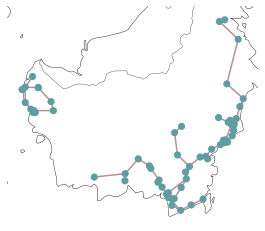

In [17]:
# determine the connected components (again?)

network.determine_network_topology()

network.plot()

In [18]:
# recalculate all electrical properties

network.lines["type"] = network.lines.voltage.map({150 : "NAYY 4x150 SE"})

network.lines["num_parallel"] = network.lines.cables/3.*network.lines.wires/network.lines.voltage.map({150 : 2.})

network.lines["s_nom"] = 3.**0.5*network.lines.voltage*network.lines.num_parallel*network.lines.voltage.map({150 : 2.})*0.65

In [ ]:
load = pd.read_csv('database/loads_kalimantan.csv', sep = ",", quotechar = "'")

In [21]:
pypsa.io.import_components_from_dataframe(network, load, "Load")

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '8750', '8751', '8752', '8753', '8754', '8755', '8756', '8757', '8758',
       '8759'],
      dtype='object', length=8760)


In [36]:
def generate_dummy_graph(network):
    graph = pypsa.descriptors.OrderedGraph()
    #graph.add_nodes_from([bus for bus in network.buses.index])

    #add positions to graph for voronoi cell computation
    for nodes in graph.nodes():
        graph.nodes[nodes]["pos"] = np.array(network.buses.loc[nodes,["x","y"]],dtype=float)

    return graph

In [37]:
graph = generate_dummy_graph(network)

graph.name = "kalimantan_01"

In [38]:
print(len(graph.nodes))

0


In [39]:
load = pd.read_csv('database/loads_kalimantan.csv', sep = ",", quotechar = "'")

In [40]:
load

,164.5760917,164.5760917.1,164.5760917.2,164.5760917.3,164.5760917.4,164.5760917.5,164.5760917.6,164.5760917.7,164.5760917.8,164.5760917.9,...,69.8133704.15,69.8133704.16,69.8133704.17,69.8133704.18,69.8133704.19,69.8133704.20,98.96466424,98.96466424.1,69.8133704.21,98.96466424.2
0,158.960350,158.960350,158.960350,158.960350,158.960350,158.960350,158.960350,158.960350,158.960350,158.960350,...,67.431166,67.431166,67.431166,67.431166,67.431166,67.431166,95.587746,95.587746,67.431166,95.587746
1,153.753464,153.753464,153.753464,153.753464,153.753464,153.753464,153.753464,153.753464,153.753464,153.753464,...,65.222399,65.222399,65.222399,65.222399,65.222399,65.222399,92.456685,92.456685,65.222399,92.456685
2,148.919357,148.919357,148.919357,148.919357,148.919357,148.919357,148.919357,148.919357,148.919357,148.919357,...,63.171765,63.171765,63.171765,63.171765,63.171765,63.171765,89.549788,89.549788,63.171765,89.549788
3,144.602331,144.602331,144.602331,144.602331,144.602331,144.602331,144.602331,144.602331,144.602331,144.602331,...,61.340478,61.340478,61.340478,61.340478,61.340478,61.340478,86.953828,86.953828,61.340478,86.953828
4,141.992875,141.992875,141.992875,141.992875,141.992875,141.992875,141.992875,141.992875,141.992875,141.992875,...,60.233544,60.233544,60.233544,60.233544,60.233544,60.233544,85.384682,85.384682,60.233544,85.384682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,177.960075,177.960075,177.960075,177.960075,177.960075,177.960075,177.960075,177.960075,177.960075,177.960075,...,75.490872,75.490872,75.490872,75.490872,75.490872,75.490872,107.012865,107.012865,75.490872,107.012865
8755,181.747994,181.747994,181.747994,181.747994,181.747994,181.747994,181.747994,181.747994,181.747994,181.747994,...,77.097712,77.097712,77.097712,77.097712,77.097712,77.097712,109.290657,109.290657,77.097712,109.290657
8756,177.635396,177.635396,177.635396,177.635396,177.635396,177.635396,177.635396,177.635396,177.635396,177.635396,...,75.353142,75.353142,75.353142,75.353142,75.353142,75.353142,106.817625,106.817625,75.353142,106.817625
8757,169.939305,169.939305,169.939305,169.939305,169.939305,169.939305,169.939305,169.939305,169.939305,169.939305,...,72.088452,72.088452,72.088452,72.088452,72.088452,72.088452,102.189729,102.189729,72.088452,102.189729


In [41]:
network.set_snapshots(pd.date_range("2021-01-01 00:00:00", "2021-12-31 23:00:00", freq = "H"))

print(network.snapshots)

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2021-12-31 14:00:00', '2021-12-31 15:00:00',
               '2021-12-31 16:00:00', '2021-12-31 17:00:00',
               '2021-12-31 18:00:00', '2021-12-31 19:00:00',
               '2021-12-31 20:00:00', '2021-12-31 21:00:00',
               '2021-12-31 22:00:00', '2021-12-31 23:00:00'],
              dtype='datetime64[ns]', name='snapshot', length=8760, freq='H')


In [42]:
for bus in graph.nodes():
    network.add("Load", bus, bus = bus,
                p_set = pd.Series(data = 1000*load.loc[network.snapshots, bus], index = network.snapshots))

In [43]:
network.loads

,bus,0,1,2,3,4,5,6,7,8,...,59,60,61,62,63,carrier,type,p_set,q_set,sign
Load,,,,,,,,,,,,,,,,,,,,,
0,01/01/2021 00:00,164.576092,164.576092,164.576092,164.576092,164.576092,164.576092,164.576092,164.576092,164.576092,...,69.813370,98.964664,98.964664,69.813370,98.964664,,,0.0,0.0,-1.0
1,01/01/2021 01:00,158.960350,158.960350,158.960350,158.960350,158.960350,158.960350,158.960350,158.960350,158.960350,...,67.431166,95.587746,95.587746,67.431166,95.587746,,,0.0,0.0,-1.0
2,01/01/2021 02:00,153.753464,153.753464,153.753464,153.753464,153.753464,153.753464,153.753464,153.753464,153.753464,...,65.222399,92.456685,92.456685,65.222399,92.456685,,,0.0,0.0,-1.0
3,01/01/2021 03:00,148.919357,148.919357,148.919357,148.919357,148.919357,148.919357,148.919357,148.919357,148.919357,...,63.171765,89.549788,89.549788,63.171765,89.549788,,,0.0,0.0,-1.0
4,01/01/2021 04:00,144.602331,144.602331,144.602331,144.602331,144.602331,144.602331,144.602331,144.602331,144.602331,...,61.340478,86.953828,86.953828,61.340478,86.953828,,,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,31/12/2021 19:00,177.960075,177.960075,177.960075,177.960075,177.960075,177.960075,177.960075,177.960075,177.960075,...,75.490872,107.012865,107.012865,75.490872,107.012865,,,0.0,0.0,-1.0
8756,31/12/2021 20:00,181.747994,181.747994,181.747994,181.747994,181.747994,181.747994,181.747994,181.747994,181.747994,...,77.097712,109.290657,109.290657,77.097712,109.290657,,,0.0,0.0,-1.0
8757,31/12/2021 21:00,177.635396,177.635396,177.635396,177.635396,177.635396,177.635396,177.635396,177.635396,177.635396,...,75.353142,106.817625,106.817625,75.353142,106.817625,,,0.0,0.0,-1.0


In [ ]:
%matplotlib inline

pd.DataFrame(load.sum(axis = 1)).plot()

load_distribution = network.loads_t.p_set.loc[network.snapshots[0]].groupby(network.loads.bus).sum()
network.plot(bus_sizes = load_distribution)

total_load = load.sum(axis = 1)
monthly_load = total_load.resample("M").sum()
monthly_load.plot(grid = True)

In [ ]:
power_plants = pd.read_csv('database/generators_kalimantan.csv', sep = ",", quotechar = "'")

In [ ]:
power_plants

In [ ]:
pypsa.io.import_components_from_dataframe(network, power_plants, "Generator")

In [ ]:
network.generators

In [ ]:
# determine the connected components again for checking the generators (perhaps)

network.determine_network_topology()

network.plot()

In [ ]:
#poly = Polygon([[106.5,3.1],[121.7,5.1],[116.5,-5.6],[109.2,-4.2]])

In [ ]:
"""
def voronoi_partition(G, outline):
    """
    For 2D-embedded graph `G`, within the boundary given by the shapely polygon
    `outline`, returns `G` with the Voronoi cell region as an additional node
    attribute.
    """
    G = graph.polygon_subgraph(G, outline, copy=False)
    points = list(graph.get_node_attributes(G, 'pos').values())
    regions = graph.voronoi_partition_pts(points, outline, no_multipolygons=True)
    nx.set_node_attributes(G, 'region', dict(zip(G.nodes(), regions)))

    return G

"""

In [ ]:
#voronoi_partition(graph, poly)

In [ ]:
from pypsa.networkclustering import get_clustering_from_busmap, busmap_by_kmeans

In [ ]:
weighting = pd.Series(1, network.buses.index)
busmap2 = busmap_by_kmeans(network, bus_weightings=weighting, n_clusters=20)

In [ ]:
C2 = get_clustering_from_busmap(network, busmap2)
nc2 = C2.network

In [ ]:
fig, (ax, ax1) = plt.subplots(1, 2, subplot_kw={"projection": ccrs.EqualEarth()}, figsize=(12,12))
plot_kwrgs = dict(bus_sizes=1e-3, line_widths=0.5)
network.plot(ax=ax, title="original", **plot_kwrgs)
nc2.plot(ax=ax1, title="clustered by kmeans", **plot_kwrgs)
fig.tight_layout()

In [ ]:
nc2.buses

In [ ]:
nc2.lines

In [ ]:
nc2.generators